In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data['Class'].value_counts()/data['Class'].count()

0    0.998273
1    0.001727
Name: Class, dtype: float64

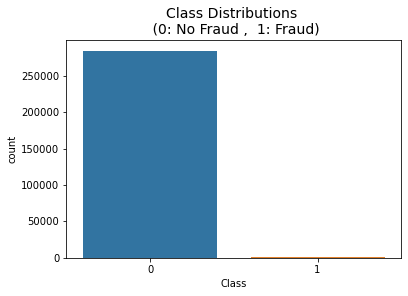

In [6]:
sns.countplot(data['Class'])
plt.title('Class Distributions \n (0: No Fraud ,  1: Fraud)', fontsize=14)
plt.show()

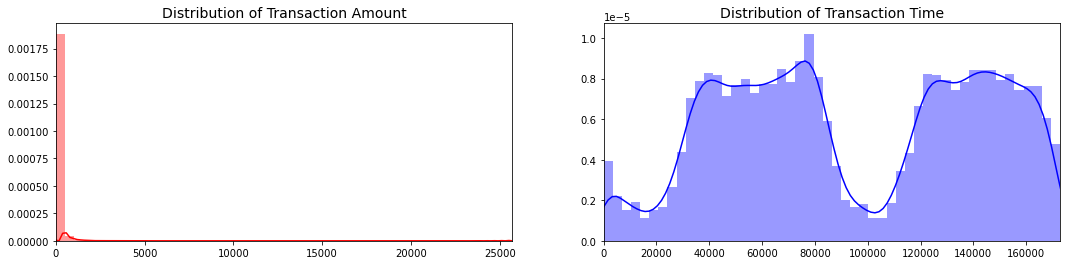

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

### scaling the amount feature

In [8]:
X, y = data.drop(['Class'], axis=1).values, data['Class'].values

In [9]:
X.shape, y.shape
np.mean(X, axis=0)

array([ 9.48138596e+04,  1.16597995e-15,  3.41690805e-16, -1.37314996e-15,
        2.08686861e-15,  9.60406632e-16,  1.49010721e-15, -5.55646730e-16,
        1.17755593e-16, -2.40645529e-15,  2.23975129e-15,  1.67332693e-15,
       -1.25499520e-15,  8.17603027e-16,  1.20629628e-15,  4.91300284e-15,
        1.43766606e-15, -3.80011269e-16,  9.57213260e-16,  1.03981681e-15,
        6.40670259e-16,  1.65656173e-16, -3.44485005e-16,  2.57864790e-16,
        4.47196822e-15,  5.34091469e-16,  1.68709835e-15, -3.66645261e-16,
       -1.22040449e-16,  8.83496193e+01])

In [10]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

rob_scaler = RobustScaler()
X_train[:, 0] = rob_scaler.fit_transform(X_train[:,0].reshape(-1,1)).squeeze()
X_test[:, 0] = rob_scaler.transform(X_test[:, 0].reshape(-1, 1)).squeeze()

rob_scaler = RobustScaler()
X_train[:, -1] = rob_scaler.fit_transform(X_train[:,-1].reshape(-1,1)).squeeze()
X_test[:, -1] = rob_scaler.transform(X_test[:, -1].reshape(-1, 1)).squeeze()

In [12]:
print(np.bincount(y_train)/len(y_train))
print(np.bincount(y_test)/len(y_test))

[0.99827075 0.00172925]
[0.99827955 0.00172045]


## Function for finding the best parameters and threshold using cross validation

In [13]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve

In [14]:
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import itertools


# Returns best threshold along with corr. score
def getBestThreshold(y_test, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    f1_scores = 2*recall*precision/(recall+precision)
    
    idx = np.argmax(f1_scores)
    return thresholds[idx], f1_scores[idx]


def modelScore(X, y, model, params, cv=None, upsample=False):
    if cv is None:
        cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    scores, thresholds = [], []
    
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        if upsample:
            # Upsample only the data in the training section
            print("Upsampling", end='  ')
            X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
        
        # Fit the model on the training data
        model_obj = model(**params).fit(X_train, y_train)
        y_pred_prob = model_obj.predict_proba(X_test)
        
        thresh, f1_score = getBestThreshold(y_test, y_pred_prob[:, 1])
        scores.append(f1_score)
        thresholds.append(thresh)
    
    return np.mean(scores), np.mean(thresholds)
    

# get best params and threshold, each key in params should have array of possible parameter choices as values
def getBestParams(X, y, model, params, cv=None, upsample=False):
    """
    Creates folds manually, and upsamples within each fold if upsample=True.
    Returns an array of validation (f1-scores) scores
    """
    
    poss_params = list(itertools.product(*params.values()))
    params_keys = list(params.keys())
    
    best_params = None
    best_score  = 0
    best_thresh = 0
    
    for curr_params_values in poss_params:
        curr_params = dict(zip(params_keys, curr_params_values))
        
        curr_score, curr_thresh = modelScore(X, y, model, curr_params, cv, upsample)
        if curr_score > best_score:
            best_score  = curr_score
            best_params = curr_params
            best_thresh = curr_thresh

    return best_params, best_score, best_thresh

## Logistic Regression without upsampling

In [41]:
from sklearn.linear_model import LogisticRegression

baseline_lr_params = {
    'penalty': ['l2'], 
    'random_state': [42], 
    'max_iter': [1000],
    'C': [0.01, 0.1, 1]
}

best_params, best_score, best_thresh = getBestParams(X_train, y_train, LogisticRegression, baseline_lr_params, upsample=False)
print()

print(best_params)
print(best_score)
print(best_thresh)


{'penalty': 'l2', 'random_state': 42, 'max_iter': 1000, 'C': 0.01}
0.8002555319313295
0.10733298835939593


In [42]:
lr_clf = LogisticRegression(**best_params).fit(X_train, y_train)
y_pred_prob_lr = lr_clf.predict_proba(X_test)[:, 1]
y_pred_lr = np.array(y_pred_prob_lr > best_thresh, dtype=np.int)

print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.80      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



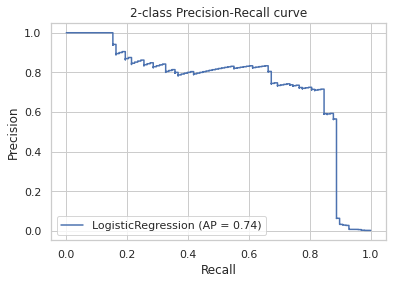

In [43]:
model = lr_clf
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

plt.show()

## Logistic Regression with upsampling

In [44]:
from sklearn.linear_model import LogisticRegression

lr_params = {
    'penalty': ['l2'], 
    'random_state': [42], 
    'max_iter': [1000],
    'C': [0.01, 0.1, 1]
}

best_params, best_score, best_thresh = getBestParams(X_train, y_train, LogisticRegression, lr_params, upsample=True)
print()

print(best_params)
print(best_score)
print(best_thresh)

Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  
{'penalty': 'l2', 'random_state': 42, 'max_iter': 1000, 'C': 1}
0.820279796695082
0.9999995734738641


### Precision-Recall curve for Logistic Regression with upsampling

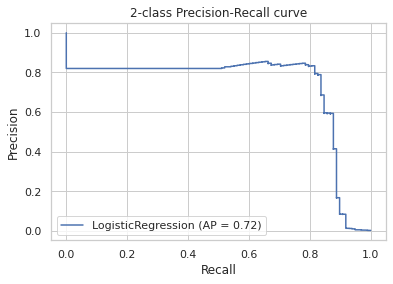

In [45]:
X_train_up, y_train_up = SMOTE(random_state=42).fit_resample(X_train, y_train)
lr_clf = LogisticRegression(**best_params).fit(X_train_up, y_train_up)

disp = plot_precision_recall_curve(lr_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

plt.show()

In [46]:
y_pred_prob_lr = lr_clf.predict_proba(X_test)[:, 1]
y_pred_lr = np.array(y_pred_prob_lr > best_thresh, dtype=np.int)

print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



**As we can see, in logistic regression after upsampling, By also altering the threshold for probability we were able to imporove recall as well as precision.**

## Random Forest without upsampling

In [47]:
from sklearn.ensemble import RandomForestClassifier

baseline_rf_params = {
    'n_estimators': 40,
    'max_depth': 30,
    'random_state': 42
}

rf_clf = RandomForestClassifier(**baseline_rf_params).fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print('Random Forest: ')
print(classification_report(y_test, y_pred_rf))

Random Forest: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



**We can see that Random forest already has a descent recall, even though it has been fitted on an imbalanced dataset**

## Random Forest with upsampling

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [10, 20, 40],
    'max_depth': [30],
    'criterion': ['entropy']
}

best_params, best_score, best_thresh = getBestParams(X_train, y_train, RandomForestClassifier, rf_params, upsample=True)
print()

print(best_params)
print(best_score)
print(best_thresh)

Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  Upsampling  
{'n_estimators': 40, 'max_depth': 30, 'criterion': 'entropy'}
0.8541803739882475
0.745


In [49]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import Pipeline 

resampling = SMOTE(random_state=42)
rf_clf = RandomForestClassifier(**best_params)
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', rf_clf)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train)

y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
y_pred_rf = np.array(y_pred_prob_rf > best_thresh, dtype=np.int)

print('Random forest:')
print(accuracy_score(y_test, y_pred_rf))
print("AUC ROC score: ", roc_auc_score(y_test, y_pred_prob_rf))
print('Classifcation report:\n', classification_report(y_test, y_pred_rf))
print('Confusion matrix:\n',  confusion_matrix(y_test, y_pred_rf))

Random forest:
0.9995786664794073
AUC ROC score:  0.9612169889058607
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.80      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56860     4]
 [   20    78]]


# AutoEncoders to the rescue
reference: https://www.kaggle.com/shivamb/semi-supervised-classification-using-autoencoders

**AutoEncoders will help us learn the complex feature representations of the data, which can then be used for classification by concatenating it's hidden layer to a classifier.**

In [15]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.manifold import TSNE
from sklearn import preprocessing

sns.set(style="whitegrid")
np.random.seed(420)

In [16]:
X, y = data.drop(['Class'], axis=1).values, data['Class'].values

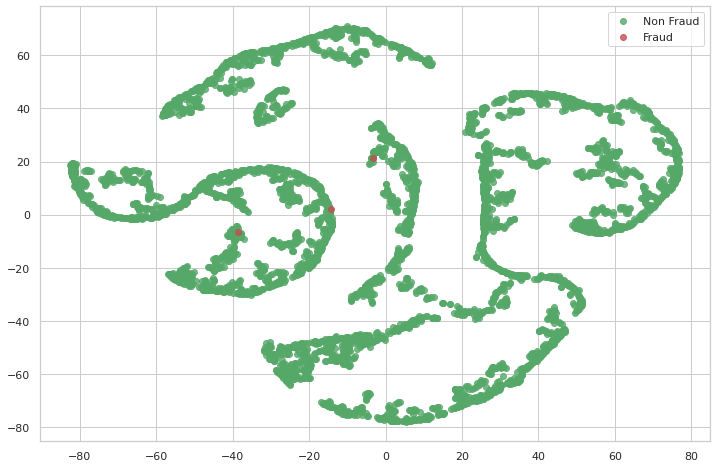

In [17]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best')
    plt.show()
    
tsne_plot(X[0:5000], y[0:5000])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

rob_scaler = preprocessing.RobustScaler()
X_train[:, 0] = rob_scaler.fit_transform(X_train[:, 0].reshape(-1, 1)).squeeze()
X_test[:, 0] = rob_scaler.transform(X_test[:, 0].reshape(-1, 1)).squeeze()

X_train[:, -1] = rob_scaler.fit_transform(X_train[:, -1].reshape(-1, 1)).squeeze()
X_test[:, -1] = rob_scaler.transform(X_test[:, -1].reshape(-1, 1)).squeeze()

X_train_norm, X_train_fraud = X_train[y_train == 0], X_train[y_train == 1]

## Architecture for Autoencoders

In [77]:
# ## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded1 = Dense(24, activation='relu', activity_regularizer=regularizers.l2(1e-5))(input_layer)
encoded2 = Dense(20, activation='relu', activity_regularizer=regularizers.l2(1e-5))(encoded1)

# hidden layer
hidden  = Dense(16, activation='relu', activity_regularizer=regularizers.l2(1e-5))(encoded2)

## decoding part
decoded1 = Dense(20, activation='relu', activity_regularizer=regularizers.l2(1e-5))(hidden)
decoded2 = Dense(24, activation='relu', activity_regularizer=regularizers.l2(1e-5))(decoded1)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded2)

In [78]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adam", loss="mse")

In [79]:
autoencoder.fit(X_train_norm[0:10000], X_train_norm[0:10000], batch_size = 256, epochs = 20, shuffle = True, validation_split = 0.20)

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 1.0210 - val_loss: 0.8103
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.7871 - val_loss: 0.7605
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.7548 - val_loss: 0.7402
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.7262 - val_loss: 0.7026
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6997 - val_loss: 0.6935
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6907 - val_loss: 0.6877
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6848 - val_loss: 0.6798
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6786 - val_loss: 0.6844
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6750 - val_loss: 0.6705
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6698 - val_loss: 0.6677

## Obtaining the latent representation

In [80]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])

In [81]:
norm_hid_rep = hidden_representation.predict(X_train_norm[0:10000])
fraud_hid_rep = hidden_representation.predict(X_train_fraud)

In [ ]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)

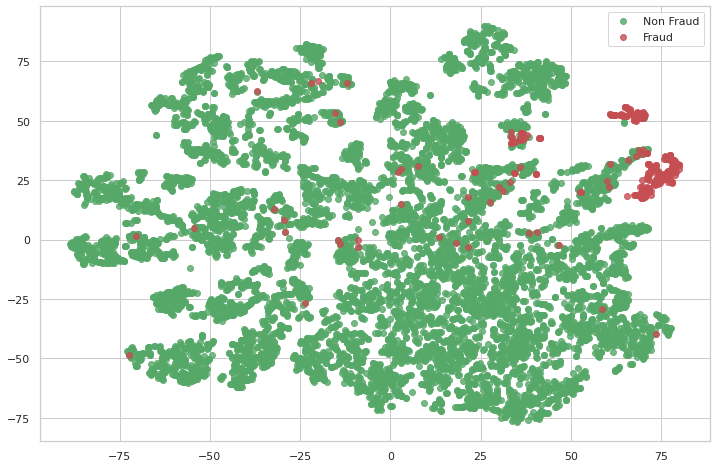

In [82]:
tsne_plot(rep_x, rep_y)

## Support Vector Machines on the latent representation of Autoencoders

In [83]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [84]:
svc_clf = SVC(gamma='auto')
svc_clf.fit(rep_x, rep_y)

SVC(gamma='auto')

In [85]:
rep_x_test = hidden_representation.predict(X_test)
y_pred_svc = svc_clf.predict(rep_x_test)

from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Support Vector Machines:')
print(accuracy_score(y_test, y_pred_svc))
print("AUC ROC score: ", roc_auc_score(y_test, y_pred_svc))
print('Classifcation report:\n', classification_report(y_test, y_pred_svc))
print('Confusion matrix:\n',  confusion_matrix(y_test, y_pred_svc))

Support Vector Machines:
0.9990168884519505
AUC ROC score:  0.8646069364986066
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.71      0.73      0.72       148

    accuracy                           1.00     85443
   macro avg       0.86      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85251    44]
 [   40   108]]


### We can do more things like Outlier Detection algos here, I will do that later.